<a href="https://colab.research.google.com/github/yasithS/DiseasePrediction/blob/main/diseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

## Loading and exploring

In [21]:
df = pd.read_csv('dataset.csv')

In [22]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(4920, 18)

In [24]:
# check for missing values in each column
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


In [25]:
# replace Nan values with empty strings ''
df.fillna('', inplace=True)

In [27]:
# listing all columns with symptoms
symptom_columns = [col for col in df.columns if col.startswith('Symptom_')]
print(symptom_columns)

['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [29]:
# extract unique diseases
unique_diseases = df['Disease'].unique()
print(len(unique_diseases))
print(unique_diseases)

41
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [30]:
# count the occurunce of each diseases
disease_counts = df['Disease'].value_counts()
print(disease_counts)

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

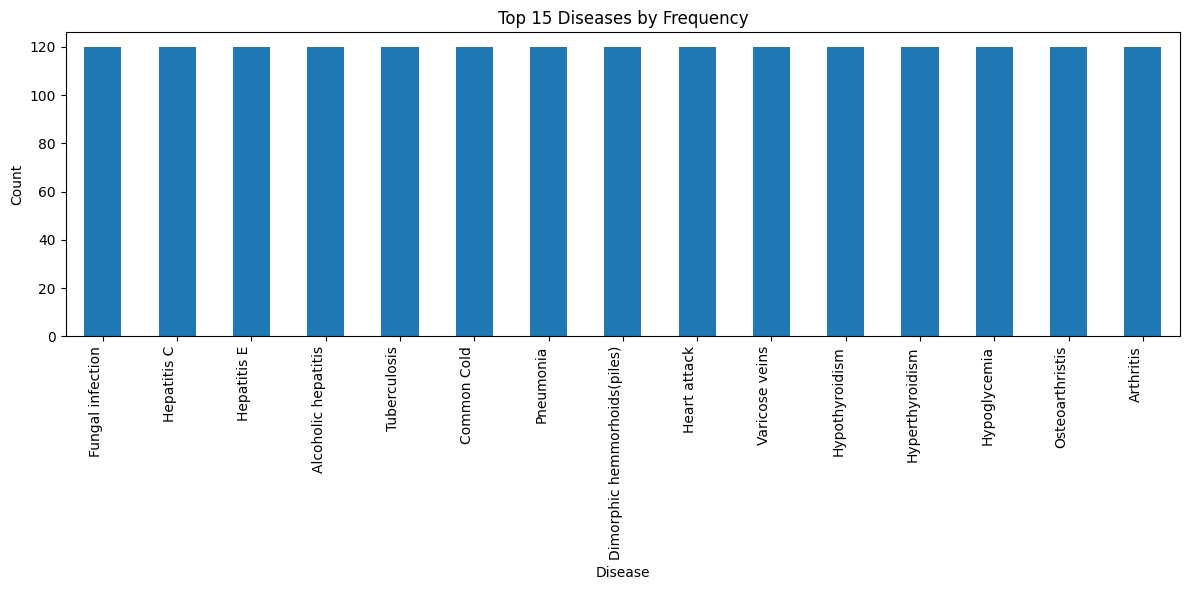

In [34]:
# plot disease distribution
plt.figure(figsize=(12, 6))
disease_counts.head(15).plot(kind='bar')
plt.title('Top 15 Diseases by Frequency')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [35]:

print(symptom_columns)

['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [37]:
# extracting all the unique symptoms from the dataset
unique_symptoms = set()
for column in symptom_columns:
    # Add all non-empty symptoms to the set
    symptoms = df[column].str.strip()
    unique_symptoms.update(symptoms[symptoms != ''].unique())

In [38]:
print(unique_symptoms)

{'weakness_of_one_body_side', 'cold_hands_and_feets', 'history_of_alcohol_consumption', 'weight_gain', 'blackheads', 'blood_in_sputum', 'yellow_crust_ooze', 'congestion', 'swollen_legs', 'loss_of_balance', 'receiving_blood_transfusion', 'continuous_sneezing', 'loss_of_smell', 'nausea', 'pain_in_anal_region', 'swelling_joints', 'dehydration', 'headache', 'itching', 'inflammatory_nails', 'blurred_and_distorted_vision', 'skin_rash', 'muscle_pain', 'passage_of_gases', 'yellowish_skin', 'foul_smell_of urine', 'lack_of_concentration', 'yellowing_of_eyes', 'internal_itching', 'sinus_pressure', 'palpitations', 'vomiting', 'swollen_extremeties', 'receiving_unsterile_injections', 'swelling_of_stomach', 'unsteadiness', 'patches_in_throat', 'increased_appetite', 'irregular_sugar_level', 'throat_irritation', 'depression', 'pain_behind_the_eyes', 'pus_filled_pimples', 'burning_micturition', 'family_history', 'breathlessness', 'sunken_eyes', 'distention_of_abdomen', 'yellow_urine', 'cough', 'spotting

In [39]:
# remove empty strings if there are some
if '' in unique_symptoms:
  unique_symptoms.remove('')

In [40]:
# convert to sorted list
all_symptoms = sorted(list(unique_symptoms))
print(all_symptoms)

['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic _patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', 'irritability', 'irritation_in_anus', 'it

In [41]:
# Get Symptom frequency

#count how often the each symptom appears
symptom_counts = {}
for symptom in all_symptoms:
    count = 0
    for column in symptom_columns:
      count += df[column].str.contains(symptom, na=False).sum()
    symptom_counts[symptom] = count


In [42]:
print(symptom_counts)

{'abdominal_pain': 1032, 'abnormal_menstruation': 240, 'acidity': 222, 'acute_liver_failure': 114, 'altered_sensorium': 114, 'anxiety': 114, 'back_pain': 228, 'belly_pain': 114, 'blackheads': 108, 'bladder_discomfort': 114, 'blister': 114, 'blood_in_sputum': 120, 'bloody_stool': 114, 'blurred_and_distorted_vision': 342, 'breathlessness': 450, 'brittle_nails': 120, 'bruising': 114, 'burning_micturition': 216, 'chest_pain': 696, 'chills': 798, 'cold_hands_and_feets': 114, 'coma': 120, 'congestion': 120, 'constipation': 228, 'continuous_feel_of_urine': 114, 'continuous_sneezing': 222, 'cough': 564, 'cramps': 114, 'dark_urine': 570, 'dehydration': 108, 'depression': 234, 'diarrhoea': 564, 'dischromic _patches': 108, 'distention_of_abdomen': 114, 'dizziness': 336, 'drying_and_tingling_lips': 114, 'enlarged_thyroid': 120, 'excessive_hunger': 462, 'extra_marital_contacts': 108, 'family_history': 228, 'fast_heart_rate': 234, 'fatigue': 1932, 'fluid_overload': 114, 'foul_smell_of urine': 102, '

In [43]:
# Convert to dataframe for easier visualization
symptom_df = pd.DataFrame({
    'Symptom': list(symptom_counts.keys()),
    'Count': list(symptom_counts.values())
})
symptom_df = symptom_df.sort_values('Count', ascending=False)


<Figure size 4500x800 with 0 Axes>

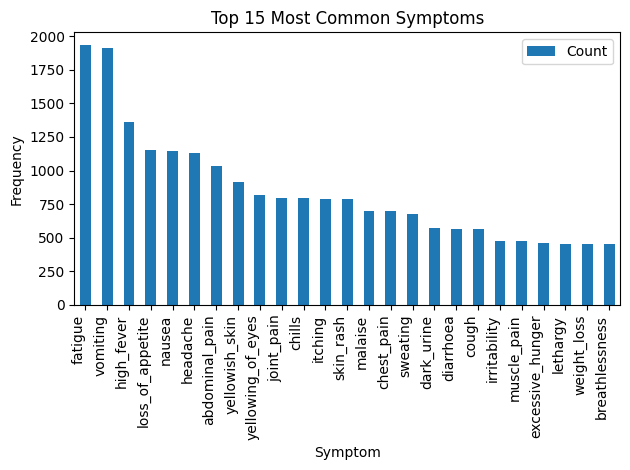

In [52]:
# Plot the top symptoms
plt.figure(figsize=(45, 8))
symptom_df.head(25).plot(kind='bar', x='Symptom', y='Count')
plt.title('Top 15 Most Common Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [54]:
# Create a one-hot encoding of symptoms
# For each row, create a binary vector indicating which symptoms are present
X = np.zeros((len(df), len(all_symptoms)))

In [55]:
# For each row in the dataset
for i, row in df.iterrows():
    # For each symptom column
    for column in symptom_columns:
        symptom = row[column].strip()
        if symptom:  # If not empty
            # Find the index of this symptom in our all_symptoms list
            symptom_index = all_symptoms.index(symptom)
            # Mark this symptom as present (1) for this row
            X[i, symptom_index] = 1

In [56]:
# Encode the disease (target variable)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Disease'])

In [60]:
# Store the mapping of encoded values to disease names for later reference
disease_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

## Spliting the dataset

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
print(X_train.shape, " -> x train shape")
print(X_test.shape, " -> x test shape")

(3936, 131)  -> x train shape
(984, 131)  -> x test shape


## Building the machine learning model

In [64]:
# train random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluating the model

In [67]:
y_pred = model.predict(X_test)

In [68]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 1.0000


In [69]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
   

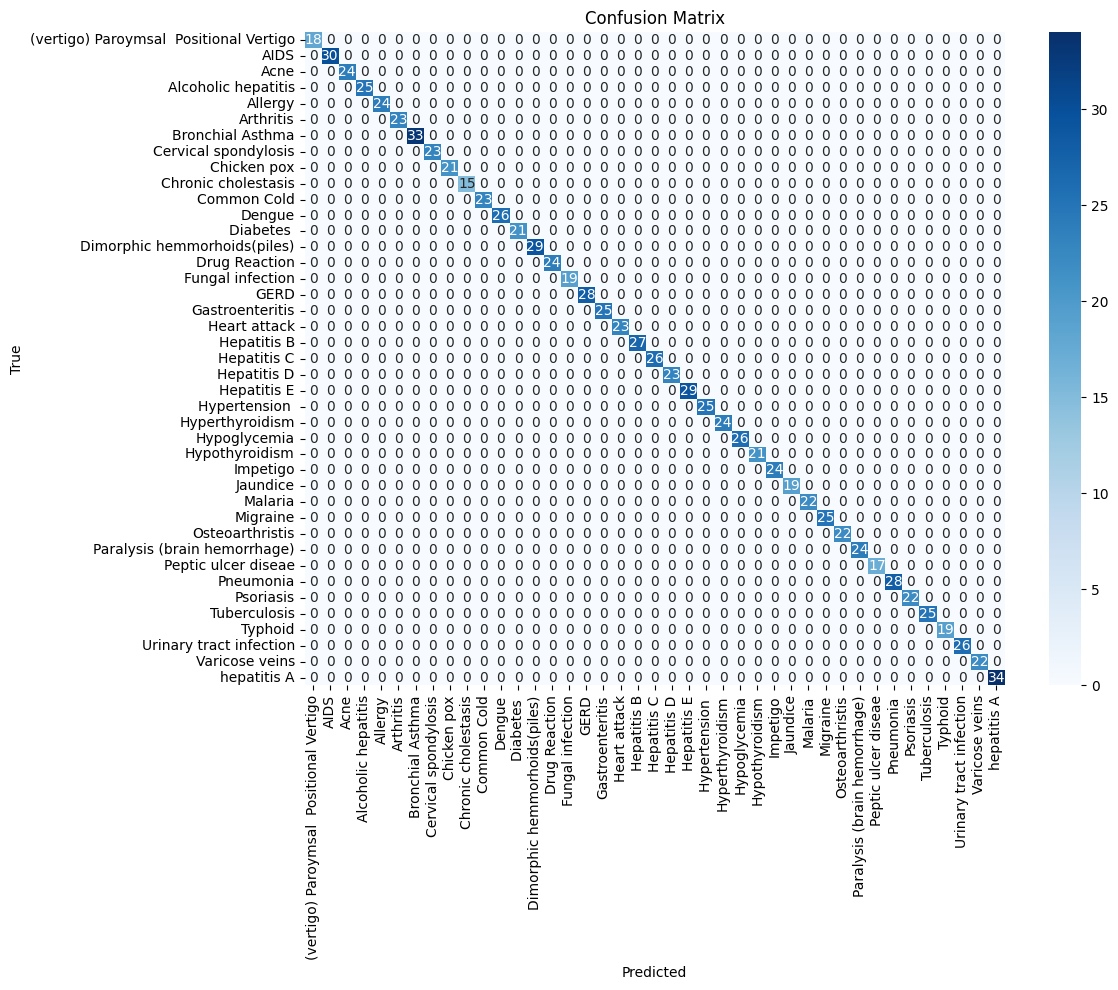

In [70]:
# Generate confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## cross validation

In [73]:
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0000
